In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
from pathlib import Path

import sklearn
import numpy as np
import pandas as pd
from glob import glob

import matplotlib
import matplotlib.pyplot as plt

# Make all python scripts available in the path
sys.path.append('../')

import pp_utils
import lrn_crv_plot
from post_proc_from_serial import parse_args_file, parse_and_agg_scores
from ml_models import plot_prfrm_metrics

%matplotlib inline

filepath = Path(os.getcwd())
print(filepath)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using TensorFlow backend.


/vol/ml/apartin/projects/LearningCurves/notebooks


In [ ]:
df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_cell/multi_seed_rf_100_trees/all_seed_runs_scores.csv'))

In [24]:
fpath = Path('/vol/ml/apartin/projects/LearningCurves/hpo_runs/lc_gdsc_nn_reg0_hpo/run/id_217/output/data.nn_reg0.adam.cvf1.GE.DD.AUC_2019-11-7_h4-m5/cv1_sz213015/')
trn_logs = fpath / 'training.log'
h = plot_prfrm_metrics(logfile_path=trn_logs, skp_ep=0, outdir=fpath, add_lr=False)

In [46]:
fpath = Path('/vol/ml/apartin/projects/LearningCurves/hpo_runs/lc_gdsc_nn_reg0_hpo/run/id_057/output/data.nn_reg0.adam.cvf1.GE.DD.AUC_2019-11-4_h23-m21/cv1_sz88416/')
trn_logs = fpath / 'training.log'
h = plot_prfrm_metrics(logfile_path=trn_logs, skp_ep=0, outdir=fpath, add_lr=False)

In [28]:
fpath = Path('/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_cell/nn_reg_ap/run_03/cv0_sz213019/')
trn_logs = fpath / 'training.log'
h = plot_prfrm_metrics(logfile_path=trn_logs, skp_ep=0, outdir=fpath, add_lr=False)

In [30]:
n_runs = 20
digits = len(str(n_runs))

In [31]:
digits

2

In [57]:
# df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_cell/multi_seed_lgbm_100_trees/all_seed_runs_scores.csv'))
df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_cell/multi_seed_rf_100_trees/all_seed_runs_scores.csv'))
df = df[(df.metric=='mean_absolute_error') & (df.set=='te')].reset_index(drop=True)

In [ ]:
# df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_cell/multi_seed_lgbm_100_trees/all_seed_runs_scores.csv'))
df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_cell/multi_seed_rf_100_trees/all_seed_runs_scores.csv'))
df = df[(df.metric=='mean_absolute_error') & (df.set=='te')].reset_index(drop=True)

In [7]:
# df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_cell/multi_seed_lgbm_100_trees/all_seed_runs_scores.csv'))
df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.top21/split_on_cell/top21.adam.nn_reg0.ge.dd.auc_2019-12-1/hpo_all.csv'))
# df = df[(df.metric=='mean_absolute_error') & (df.set=='te')].reset_index(drop=True)

In [10]:
cols = ['mean_absolute_error', 'tr_size']
df[cols]

,mean_absolute_error,tr_size
0,0.055923,392156
1,0.059719,131072
2,0.056969,262144
3,0.063548,65536
4,0.063102,32768


In [34]:
2**9

512

In [41]:
2**16

65536

In [43]:
m = np.linspace(500, 30000, 30)
m = np.array( [int(i) for i in m] )
m

array([  500,  1517,  2534,  3551,  4568,  5586,  6603,  7620,  8637,
        9655, 10672, 11689, 12706, 13724, 14741, 15758, 16775, 17793,
       18810, 19827, 20844, 21862, 22879, 23896, 24913, 25931, 26948,
       27965, 28982, 30000])

### m = np.linspace(500, 15000, 20)
m = np.array( [int(i) for i in m] )
m

In [19]:
lrn_crv_scores = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_cell/multi_seed_lgbm_100_trees/top6.lgb_reg.ge.dd.auc1_2019-12-2_h0-m23/lrn_crv_scores.csv'))

In [20]:
scores_te = lrn_crv_scores[(lrn_crv_scores.metric=='mean_absolute_error') & (lrn_crv_scores.set=='te')].sort_values('tr_size').reset_index(drop=True)

In [21]:
scores_te

,metric,tr_size,set,fold0
0,mean_absolute_error,128,te,0.122358
1,mean_absolute_error,256,te,0.110238
2,mean_absolute_error,512,te,0.106403
3,mean_absolute_error,1024,te,0.101531
4,mean_absolute_error,2048,te,0.093893
5,mean_absolute_error,4096,te,0.087796
6,mean_absolute_error,8192,te,0.086551
7,mean_absolute_error,16384,te,0.082146
8,mean_absolute_error,32768,te,0.080349
9,mean_absolute_error,65536,te,0.080122


## Response and goodness of fit

In [31]:
rsp = pd.read_csv(Path('../data/combined_single_response_agg'), sep='\t', engine='c', low_memory=False)
print(rsp.shape)
display(rsp[:2])

(4484080, 14)


,SOURCE,CELL,DRUG,STUDY,AUC,IC50,EC50,EC50se,R2fit,Einf,HS,AAC1,AUC1,DSS1
0,CCLE,CCLE.1321N1,CCLE.1,fake_exp,0.8330,4.883,5.183,0.5746,0.9864,0.2017,0.7463,0.1017,0.8983,0.0551
1,CCLE,CCLE.1321N1,CCLE.10,fake_exp,0.7909,5.217,5.217,2.2840,0.6526,0.0000,0.8993,0.1136,0.8864,0.0728


In [32]:
# Some responses have very bad fit
print('Total samples with R2fit<0:', rsp[rsp['R2fit']<0].shape[0])

# Keep a subset of responses
rsp = rsp[rsp['R2fit']>0]
print(rsp.shape)

Total samples with R2fit<0: 44661


(0, 1)

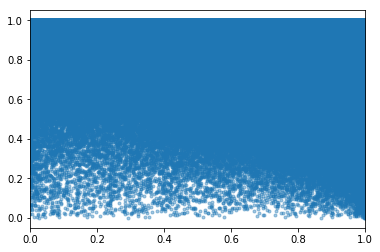

In [34]:
plt.plot(rsp['R2fit'], rsp['AUC'], '.', alpha=0.4)
# plt.xlim([0, 1])

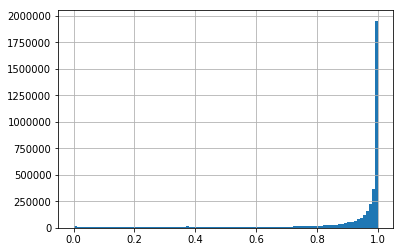

In [35]:
plt.hist(rsp['R2fit'], bins=100);
plt.grid(True)

In [41]:
r = rsp[rsp['EC50se'] < 100]
print(r.shape)

(3327420, 14)


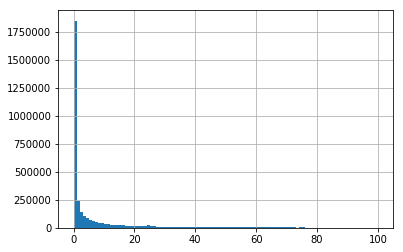

In [42]:
plt.hist(r['EC50se'], bins=100);
plt.grid(True)

## Compare (in)consistencies between Rick's and Harry's Top6 datasets

In [3]:
# Rick
xr = pd.read_parquet(Path('../../pilot1/data/processed/data_splits/top6_cv_simple/xdata.parquet'))
yr = pd.read_parquet(Path('../../pilot1/data/processed/data_splits/top6_cv_simple/ydata.parquet'))
print(xr.shape)
print(yr.shape)

(283152, 6212)
(283152, 1)


In [5]:
# Harry
xh = pd.read_parquet(Path('../top6_data_splits_/xdata.parquet'))
mh = pd.read_parquet(Path('../top6_data_splits_/meta.parquet'))
print(xh.shape)
print(mh.shape)

(285004, 6212)
(285004, 3)


In [11]:
xr[sorted(xr.columns)].head()

,DD_AAC,DD_AECC,DD_ALOGP,DD_ALOGP2,DD_AMR,DD_AMW,DD_AROM,DD_ARR,DD_ASP,DD_ATS1e,...,GE_ZMIZ1,GE_ZMYM2,GE_ZNF131,GE_ZNF274,GE_ZNF318,GE_ZNF395,GE_ZNF451,GE_ZNF586,GE_ZNF589,GE_ZW10
0,1.776,23.538,10.495,110.149,256.841,8.123,0.0,0.338,0.0,4.875,...,0.142000,-0.7695,-0.4844,-0.6543,-1.44600,-0.8420,-0.355500,-0.47530,-1.3390,-0.4937
1,1.776,23.538,10.495,110.149,256.841,8.123,0.0,0.338,0.0,4.875,...,0.532700,0.6830,0.0725,0.2411,-0.26150,-0.1866,-0.299600,1.35450,1.3560,1.5620
2,1.776,23.538,10.495,110.149,256.841,8.123,0.0,0.338,0.0,4.875,...,0.005966,-0.4277,-0.4485,-0.1606,0.02827,-0.5300,0.073000,-0.05112,-0.2966,-0.1231
3,1.776,23.538,10.495,110.149,256.841,8.123,0.0,0.338,0.0,4.875,...,-0.444300,-0.6230,-0.7360,0.3904,-0.68260,-1.5740,-0.392800,1.16100,-0.5810,-0.3252
4,1.776,23.538,10.495,110.149,256.841,8.123,0.0,0.338,0.0,4.875,...,0.243900,0.2925,0.2522,-0.9067,0.60740,0.6090,-0.001514,-0.20860,0.5770,0.4160


In [12]:
xh[sorted(xh.columns)].head()

,DD_AAC,DD_AECC,DD_ALOGP,DD_ALOGP2,DD_AMR,DD_AMW,DD_AROM,DD_ARR,DD_ASP,DD_ATS1e,...,GE_ZMIZ1,GE_ZMYM2,GE_ZNF131,GE_ZNF274,GE_ZNF318,GE_ZNF395,GE_ZNF451,GE_ZNF586,GE_ZNF589,GE_ZW10
0,1.895,5.357,0.052,0.003,47.659,9.709,0.0,0.333,0.0,3.208,...,3.855,2.140,1.472,2.960,0.4844,3.002,1.4260,1.736,1.1030,1.863
1,1.483,12.559,4.887,23.886,222.539,6.932,0.0,0.239,0.0,4.863,...,1.213,1.760,2.250,2.904,2.2230,1.640,1.6130,1.268,0.7886,2.148
2,1.991,9.815,2.776,7.703,97.796,10.506,0.0,0.552,0.0,3.884,...,1.640,2.900,0.726,2.088,0.7876,1.616,1.5205,0.907,1.2990,1.137
3,1.840,7.762,-1.515,2.297,69.605,8.259,0.0,0.435,0.0,3.767,...,2.492,2.902,1.343,2.025,2.5700,2.432,2.1330,1.241,1.6040,1.788
4,1.885,9.417,5.905,34.873,110.533,13.864,0.0,0.462,0.0,3.673,...,1.956,3.140,1.591,2.854,2.1800,2.914,2.2700,1.592,1.8820,2.781


In [80]:
from sklearn.model_selection import ParameterGrid
BATCH = [32, 64, 128]
BATCHNORM = [False, True]
DR_RATE = [0.1, 0.2, 0.3, 0.4]
LR = [0.001, 0.0001]

prm_grid = {'batch_size': BATCH, 'dr_rate': DR_RATE,
            'batchnorm': BATCHNORM, 'lr': LR}

sets = list(ParameterGrid(prm_grid))
print('Total HP sets', len(sets))

Total HP sets 48


In [82]:
type(sets)

list

In [90]:
arg_list = []
for arg, value in sets[1].items():
    arg_list.append(f'--{arg}')
    arg_list.append(f'{value}')

In [91]:
arg_list

['--batch_size',
 '32',
 '--batchnorm',
 'False',
 '--dr_rate',
 '0.1',
 '--lr',
 '0.0001']

In [85]:
for hp_set in sets:
    arg_list = []
    for arg, value in sets[1].items():
        arg_list.append(f'--{arg}')
        arg_list.append(f'{value}')        

{'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.1, 'lr': 0.001}
{'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.1, 'lr': 0.0001}
{'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.2, 'lr': 0.001}
{'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.2, 'lr': 0.0001}
{'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.3, 'lr': 0.001}
{'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.3, 'lr': 0.0001}
{'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.4, 'lr': 0.001}
{'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.4, 'lr': 0.0001}
{'batch_size': 32, 'batchnorm': True, 'dr_rate': 0.1, 'lr': 0.001}
{'batch_size': 32, 'batchnorm': True, 'dr_rate': 0.1, 'lr': 0.0001}
{'batch_size': 32, 'batchnorm': True, 'dr_rate': 0.2, 'lr': 0.001}
{'batch_size': 32, 'batchnorm': True, 'dr_rate': 0.2, 'lr': 0.0001}
{'batch_size': 32, 'batchnorm': True, 'dr_rate': 0.3, 'lr': 0.001}
{'batch_size': 32, 'batchnorm': True, 'dr_rate': 0.3, 'lr': 0.0001}
{'batch_size': 32, 'batchnorm': True, 'dr_rate'

In [79]:
sets

In [81]:
sets

[{'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.1, 'lr': 0.001},
 {'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.1, 'lr': 0.0001},
 {'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.2, 'lr': 0.001},
 {'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.2, 'lr': 0.0001},
 {'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.3, 'lr': 0.001},
 {'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.3, 'lr': 0.0001},
 {'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.4, 'lr': 0.001},
 {'batch_size': 32, 'batchnorm': False, 'dr_rate': 0.4, 'lr': 0.0001},
 {'batch_size': 32, 'batchnorm': True, 'dr_rate': 0.1, 'lr': 0.001},
 {'batch_size': 32, 'batchnorm': True, 'dr_rate': 0.1, 'lr': 0.0001},
 {'batch_size': 32, 'batchnorm': True, 'dr_rate': 0.2, 'lr': 0.001},
 {'batch_size': 32, 'batchnorm': True, 'dr_rate': 0.2, 'lr': 0.0001},
 {'batch_size': 32, 'batchnorm': True, 'dr_rate': 0.3, 'lr': 0.001},
 {'batch_size': 32, 'batchnorm': True, 'dr_rate': 0.3, 'lr': 0.0001},
 {'batch_size': 32,

In [51]:
# df = pd.read_csv('/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_cell/top6.lgb_reg.ge.dd.auc_2019-12-3_h19-m30/lrn_crv_scores.csv')

# x, y = pp_utils.get_xy(path='/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_cell/top6.lgb_reg.ge.dd.auc_2019-12-3_h19-m30/lrn_crv_scores.csv')
x, y = pp_utils.get_xy(df)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9367967ef0>,
 {'alpha': 0.47692149055689514,
  'beta': -0.38921419192615353,
  'gamma': 0.051767191229699756},
 {'rmse': 0.0007633221154049152, 'mae': 0.0005062630105719133})

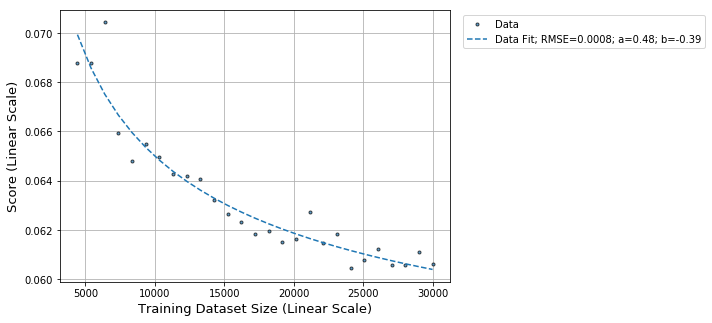

In [66]:
lrn_crv_plot.plot_lrn_crv_power_law(x[4:], y[4:], xtick_scale='linear', ytick_scale='linear')

In [68]:
lrn_crv_plot.lrn_crv_power_law_extrapolate(x[4:], y[4:], n_pnts_ext=18, xtick_scale='linear', ytick_scale='linear')

In [52]:
x

array([  500,  1483,  2466,  3450,  4433,  5416,  6400,  7383,  8366,
        9350, 10333, 11316, 12300, 13283, 14266, 15250, 16233, 17216,
       18200, 19183, 20166, 21150, 22133, 23116, 24100, 25083, 26066,
       27050, 28033, 29016, 30000])

In [48]:
df.metric=='mean_'

,metric,tr_size,set,fold0
0,mean_absolute_error,500,tr,0.019850
1,mean_absolute_error,1483,tr,0.024511
2,mean_absolute_error,2466,tr,0.029370
3,mean_absolute_error,3450,tr,0.032100
4,mean_absolute_error,4433,tr,0.036693
5,mean_absolute_error,5416,tr,0.043911
6,mean_absolute_error,6400,tr,0.042493
7,mean_absolute_error,7383,tr,0.045282
8,mean_absolute_error,8366,tr,0.041547
9,mean_absolute_error,9350,tr,0.043729


# Weighted non-linear curve fitting (power-law)

In [6]:
import pandas as pd
from scipy.optimize import curve_fit
# from lmfit import Model
from scipy.optimize import leastsq

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
maindir = filepath / '../gdsc_trn/split_on_none'  # Results dir
# maindir = filepath / '../ctrp_trn/split_on_none'  # Results dir
# maindir = filepath / '../top6_trn/split_on_none'  # Results dir

In [ ]:
lgb_reg_dir = maindir / 'gdsc.lgb_reg.cvf1.GE.DD.AUC_2019-11-4_h10-m20'
rf_reg_dir  = maindir / 'gdsc.rf_reg.cvf1.GE.DD.AUC_2019-11-4_h10-m48'
nn_reg_dir  = maindir / 'gdsc.adam.nn_reg0.cvf1.GE.DD.AUC_2019-11-3_h14-m30'
# nn_reg_auc_clr_dir = maindir / 'gdsc.sgd.trng1.nn_reg0.cvf1.GE.DD.AUC_2019-11-5_h15-m55'

In [ ]:
rt = pd.read_csv(Path('../top6_trn/top6.lgb_reg.cvf1.GE.DD.AUC_2019-9-22_h21-m18/runtime.csv'))
rt.head()

## insert shards into master table

In [56]:
import lrn_crv_plot
import pp_utils

In [57]:
p1 = Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_none/gdsc.adam.nn_reg0.ge.dd.auc_2019-11-20_LS_best')
df1 = pd.read_csv(p1/'lrn_crv_scores.csv')

p2 = Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_none/gdsc.adam.nn_reg0.cvf1.ge.dd.auc_2019-11-25_tr_sz_8192')
df2 = pd.read_csv(p2/'lrn_crv_scores.csv')

In [58]:
tr_sz = df2['tr_size'].unique()[0]
df1 = df1[ df1['tr_size']!=tr_sz ]
df = pd.concat([df2, df1], axis=0).sort_values('tr_size').reset_index(drop=True)

In [61]:
fname = os.getcwd()

In [63]:
df.to_csv(Path(fname)/'../trn.gdsc/split_on_none/nn_reg0_ls_best/lrn_crv_scores.csv')

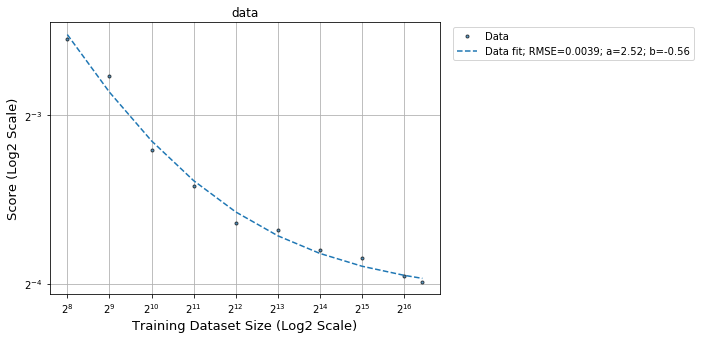

In [55]:
shard_min_idx = 1
x, y = pp_utils.get_xy(scores=df, metric_name='mean_absolute_error', tr_set='te', shard_min_idx=1, cv_folds=1)
lrn_crv_plot.plot_lrn_crv_power_law( x=x, y=y, title='data',  plot_fit=True);

In [34]:
dd

,metric,tr_size,set,fold0
154,mean_absolute_error,128,te,0.466995
155,mean_absolute_error,256,te,0.170754
156,mean_absolute_error,512,te,0.146990
157,mean_absolute_error,1024,te,0.108193
158,mean_absolute_error,2048,te,0.093318
159,mean_absolute_error,4096,te,0.080185
14,mean_absolute_error,8192,te,0.077911
160,mean_absolute_error,8192,te,0.080440
161,mean_absolute_error,16384,te,0.071888
162,mean_absolute_error,32768,te,0.069285


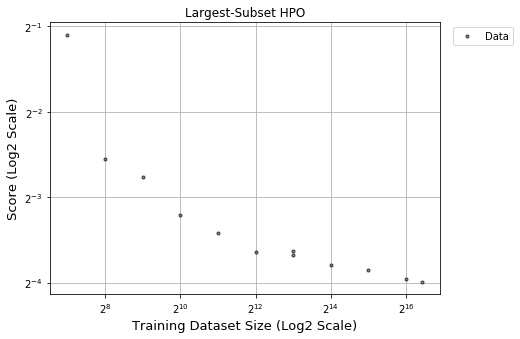

In [35]:
lrn_crv_plot.plot_lrn_crv_power_law( x = dd['tr_size'], y = dd['fold0'], title='Largest-Subset HPO',  plot_fit=False);

In [29]:
dd

,metric,tr_size,set,fold0
14,mean_absolute_error,8192,te,0.077911
154,mean_absolute_error,128,te,0.466995
155,mean_absolute_error,256,te,0.170754
156,mean_absolute_error,512,te,0.146990
157,mean_absolute_error,1024,te,0.108193
158,mean_absolute_error,2048,te,0.093318
159,mean_absolute_error,4096,te,0.080185
160,mean_absolute_error,8192,te,0.080440
161,mean_absolute_error,16384,te,0.071888
162,mean_absolute_error,32768,te,0.069285


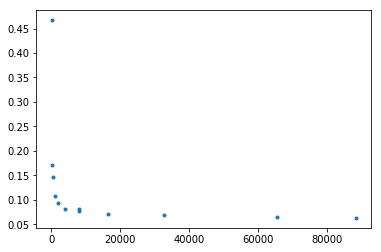

In [30]:
plt.plot(dd['tr_size'], dd['fold0'], '.')

8192